# Linear Search

## From timings to asymptotic analysis 

We want to analyze the efficiency of algorithms. We want to do so by looking at the running time of an algorithm. This sound easy and difficult. 

It seems easy, because we can simply check how many seconds an algorithm runs. To illustrate this, we look at how long it takes to check whether a given number $x$ in a collection $A$ of numbers.

In [6]:
A=[10, 17, 22, 1, 9, 5]

In [7]:
%%timeit
11 in A

390 ns ± 90.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [8]:
%%timeit
11 in A

313 ns ± 114 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


So what does this number tell us about the algorithm? Not much yet. We can try to use it to compare it to a different algorithm. We again use an algorithm that checks for a number, but this time the collection $A$ is stored differently (we will see more about different Python data-types in a different lecture, for now we can simply think of this as different data structures implementing 'in').

In [9]:
A= set([10, 17, 22, 1, 9, 5])

In [10]:
%%timeit
11 in A

60.4 ns ± 1.48 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


We observe that the algorithm ran faster (on my machine, this time). But there is little we can conclude from this: it only tells us something about the running time for a specific $A$, a specific $x$, and on my computer. Naturally we would be interested in the running time for large instances, since we want to know how scalable the algorithms are. We can test larger instances, and we are testing the data types: list and set.

In [11]:
A = list(range(2, 300))

In [12]:
%%timeit
1 in A

6.11 µs ± 635 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
A = set(range(2, 300))

In [14]:
%%timeit
1 in A

86.9 ns ± 14 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In preparation of plotting running times, lets achieve (nearly) the same time measurement as above in a different way. 'repeat=3' repeats timeit 3 times, and by taking the minimum ('min') we take the best out of 3. The rationale of taking the 'best of 3' is to ignore runs that are slowed down by my computer being busy with other processes. The result is in seconds but measured over $10^6$ loops, which corresponds to microseconds per loop.

In [15]:
import timeit
min(timeit.repeat(repeat=3, stmt='1 in A', setup='A = set(range(2, 300))'))

0.07980849998421036

The difference between lists and sets seems to get more significant with increasing size of A. Lists are now much slower, while sets didn't really get slower at all. Without any attempt to explain the following code right now, we can also look at how the running time grows with increasing input size.

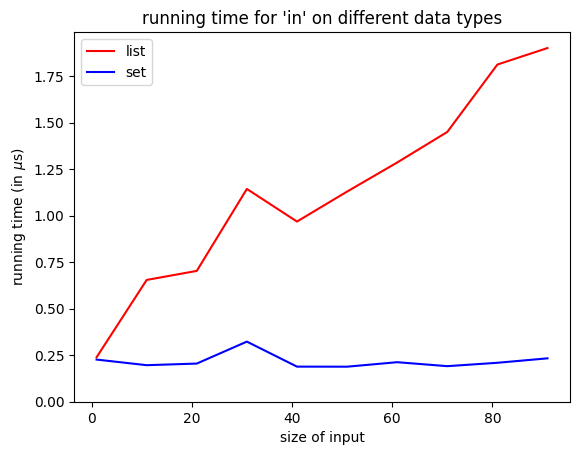

In [29]:
import timeit

def test_in(A,x):
    return x in A

x = range(1, 101, 10)
y = []
z = []
for n in x:
    A = list(range(0, n))
    y.append(min(timeit.repeat(lambda: test_in(A, 1000), repeat=3)))
    B = set(range(0, n))
    z.append(min(timeit.repeat(lambda: test_in(B, 1000), repeat=3)))

%matplotlib inline
import matplotlib.pyplot as plt
list_plot, =  plt.plot(x,y,'r') # plot list 'in' in red
set_plot, = plt.plot(x,z,'b') # plot set 'in' in blue
plt.legend([list_plot, set_plot], ['list', 'set'])
plt.ylabel('running time (in $\mu$s)')
plt.xlabel('size of input')
plt.title('running time for \'in\' on different data types')
plt.ylim(ymin=0)
plt.show()

In this plot we seem to see a very clear distinction. The running time of 'in' seems to grow linearly for lists, but doesn't seem to grow for sets. Thus the order of growth is different, and the order of growth seems to be what really matters here. The beauty of the asymptotic analysis that we will discuss in the first lecture is that we can work with the order of growth without resorting to experiments. At the end of this lecture it should be clear why the running time for 'in' on lists (which for this purpose are very similar to arrays) is 'in $O(n)$'. The running time of 'in' in sets, however, we will come back to much later in the course.

## Linear search in python

On the slides I use pseudo-code for linear search, since at this point I assume it is easier to read for you. But we can very easily re-write the pseudo-code as python code. Recall that the pseudo-code was

Linear-Search(A, n, x)
1. Set answer to Not-Found
2. For each index i, going from 1 to n, in order:
3.   If A[i] = x, then set answer to the value of i
4. Return the value of answer as the output

In Python this would read as follows (we will use -1 to represent Not-Found). Note that the index of the first element is 0 (and not 1). Further note that range(start, stop) includes the numbers from start to stop-1 (and not stop).

In [17]:
def linear_search(A, x):
    answer = -1
    for i in range(0, len(A)):
        if A[i] == x: answer = i
    return answer

In [18]:
linear_search([10, 5, 9, 9], 10)

0

In [19]:
linear_search([10, 5, 9, 9], 9)

3

In [20]:
linear_search([10, 5, 9, 9], 8)

-1

Also the better linear search can be directly translated into python:

Better-Linear-Search(A, n, x)

1. For i = 1 to n:
    If A[i] = x, then return the value of i as the output
2. Return Not-Found as the output

In [21]:
def better_linear_search(A, x):
    for i in range(0, len(A)):
        if A[i] == x: return i
    return -1

In [22]:
better_linear_search([10, 5, 9, 9], 10)

0

In [23]:
better_linear_search([10, 5, 9, 9], 9)

2

In [24]:
better_linear_search([10, 5, 9, 9], 8)

-1

Note that the algorithm is again correct, but produces a different output! We could be even more careful when specifying the output. We can use the plotting code from above to experimentally evaluate the performance of the two algorithms, although we already know what to expect from the theoretical analysis.

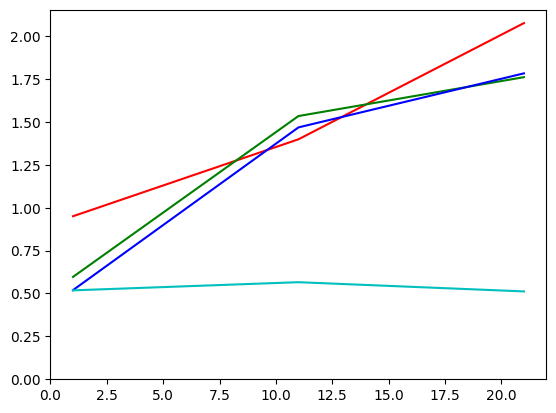

In [25]:
# import matplotlib.pyplot as plt
x = range(1, 31, 10)
y_1 = []
y_2 = []
y_3 = []
y_4 = []

for n in x:
    A = list(range(0, n))
    y_1.append(timeit.timeit(lambda: linear_search(A, 1000)))
    y_2.append(timeit.timeit(lambda: linear_search(A, 0)))
    y_3.append(timeit.timeit(lambda: better_linear_search(A, 1000)))
    y_4.append(timeit.timeit(lambda: better_linear_search(A, 0)))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y_1,'r') 
plt.plot(x,y_2,'g') 
plt.plot(x,y_3,'b') 
plt.plot(x,y_4,'c')
plt.ylim(ymin=0)
plt.show()

As expected the best case for better_linear_search is much better, i.e., seemingly O(1). The worst-case of both searches seems to be indeed linear (although from experiments we can't actually say whether things couldn't get even worse). Asymptotic analysis to the rescue!

## Linear search on data

Finally lets actually use linear search on some data. We will use some weather data from the closest weather station, which is in Eindhoven. The file 'weather-eindhoven.csv' contains weather information for each day between 1985 and 2016. The variables are explained in 'weather-variables.txt'. Lets say we want to find the first day since 1985 for which the maximum temperature was exactly 30.0 degrees celsius.

In [29]:
import csv

with open('data/weather-eindhoven.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip header row
    datatype = int
    date = []
    max_temperature = []
    for row in reader:
        date.append(datatype(row[1])) #column 1 (that is, the second) contains the date
        max_temperature.append(datatype(row[14])/10) # column 14 contains the max temperature times 10

In [58]:
index = better_linear_search(max_temperature, 30)
print(date[index])

19950720


In [59]:
from datetime import datetime

def timestamp_to_str(timestamp_string):
    datetime_object = datetime.fromtimestamp(timestamp_string)
    return datetime_object

print(timestamp_to_str(date[index]))

1970-08-19 23:52:00


Asking for the first occurence of exactly 30 degrees seems not very interesting. Adapt the linear search algorithm(s) to answer questions like: When was the last time that the maximum temperature was below -5 degrees? What is the overall maximum temperature? How many days had a maximum temperature between 20 and 30 degrees?

In [60]:
def linear_search(A, x):
    answer = -1
    for i in range(0, len(A)):
        if A[i] < x: answer = i
    return answer

In [61]:
index = linear_search(max_temperature,-5)
print(timestamp_to_str(date[index]))

1970-08-21 22:56:47


In [62]:
max(max_temperature)

36.6

All of the above we can quite easily achieve by small changes to the linear search algorithm. But everytime we want to ask such a question, we potentially search through the whole data. Can we do faster? More concretely, if we know that we want to ask many such questions, can we improve the time that we spend on each question? We will take a closer look at this in the second lecture.